# APPLICATION  D'UNE METHODE D'ECHANTILLONNAGE D'IMPORTANCE (statique) POUR UNE SIMULATION BAYESIENNE A POSTERIORI

Donnees X  ~ Loi NORMALE (THETA,1). La derniere donnee observee est censuree a droite.  
A priori sur THETA = Loi NORMALE (MU,1) d'hyperparametre MU 

In [1]:
%matplotlib inline
from scipy import log, pi, exp, sqrt
from scipy import __version__ as sci_version
from scipy.stats import norm
from numpy.random import normal, uniform, choice
from statistics import mean
from matplotlib import __version__ as mpl_version
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(
      "scipy version " +  sci_version + 
      "\nnumpy version " + np.__version__ +
      "\nmatplotlib version " + mpl_version 
     )

scipy version 1.3.1
numpy version 1.16.0
matplotlib version 3.1.1


## Jeu de donnees 

15 donnees simulees selon la loi NORMALE (0,1), la derniere donnee est censuree a droite.

In [3]:
data = [ 0.8114032, -0.4631576, -0.5984133,  1.5006175, 
        0.2123149, -1.0101033,1.0199253, -2.5994554,
        -0.3684774,  0.8263161,  0.4572680, -0.7240380,
        -0.3134977, -0.3772193, 1.64]

In [ ]:
## Algorithme d'Importance Sampling (echantillonnage d'importance, ou preferentiel, ou pondere....)

### Densite de la loi a priori sur theta

In [4]:
def gaussian_log_prior(theta, mu = 0) :
    # La variance est fixee a 1
    return - (1 / 2) * log(2 * pi) - (1 / 2) * (theta - mu) ** 2

def gaussian_prior_density(theta, mu = 0) :
    return exp(gaussian_log_prior(theta, mu))

### Densite de la loi a posteriori sur theta (définie a un facteurpres)

In [5]:
def log_posterior(data, theta, mu_post = 0, sigma_post = 1) :
    # Terme gaussien regulier
    ll1 = - (1 / (2 * sigma_post ** 2)) * (theta - mu_post) ** 2
    # Terme lie a la censure
    ll2 = log(1 - norm(loc = 0, scale = 1).cdf(data[-1:][0] - theta))
    return ll1 + ll2

### Densite sur la loi instrumentale

In [6]:
def log_instrumental(theta, mean, sigma) :
    return - (1/2) * log(2 * pi) - log(sigma) - (1/(2 * sigma ** 2)) * (theta - mean)** 2

def density_instrumental(theta, mean, sigma) :
    return exp(log_instrumental(theta, mean, sigma))

In [ ]:
### Algorithme d'Importance Sampling


N = nombre de tirages desires a posteriori  
mu = moyenne a priori pour X   
option =  1 : tirage instrumental (d'importance) dans la loi a posteriori en "oubliant" la donnee censuree   
option =  2 : tirage instrumental (d'importance) dans la loi a priori

In [7]:
def importance_sampling(data, option = 1, N = 5000, mu = 2) :
    
    # Initialisation
    n_samples = 20 * N # Heuristique de Rubin
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 8))
    
    n = len(data)
    mean_post  = (mu + sum(data[:-1])) / n 
    sigma_post = sqrt(1/n)
    space = np.linspace(-4,4,60)
    
    # Application de l'option
    if option == 1 :
        m = mean_post
        sigma = sigma_post
    if option == 2 :
        m = mu
        sigma = 1
     
    # Algorithme d'importance sampling
    
    theta = normal(m, sigma, n_samples) # Tirage instrumental
    log_post = log_posterior(data, theta, mu_post = mean_post, sigma_post = sigma_post) 
    log_inst = log_instrumental(theta, mean = m, sigma = sigma)
    
    # Calcul des poids
    # weights = ...
    
    # Simulation a posteriori par rééchantillonnage
    # theta_post = 
    
    # Calculer la constante de normalisation
    C = 1 / np.mean(exp(log_post - log_inst))
        
    # Plotter les resultats
    hist = np.histogram(theta, density = True, bins = 30)
    ax1.hist(theta, bins = 30, density = True, label = "Theta")
    # Passage des poids à l'échelle pour qu'ils apparaissent sur l'histogramme
    ax1.plot(np.unique(theta), np.unique(weights) * hist[0].max() / weights.max(), "|", label = "Poids")
    ax1.relim()
    ax1.set_title("Hist. des tirages d'importance + distribution des poids")
    ax1.set_xlabel("Theta (tirage instrumental)")
    ax1.set_ylabel("Densite")
    ax1.legend()
    ax2.hist(theta_post, density = True, bins = 30)
    ax2.plot(space, [density_instrumental(x, m, sigma) for x in space], color = "orange", ls = "-",
                label = "Distribution instrumentale")
    ax2.plot(space, [gaussian_prior_density(x) for x in space], color = "green", ls = "--",
                label = "Distribution a priori")
    ax2.plot(space, [C * exp(log_posterior(data, x, mean_post, sigma_post)) for x in space], 
                 color = "red", ls = "--", label = "Distribution a posteriori")
    ax2.relim()
    ax2.set_title("Histogramme des simulations reechantillonnees")
    ax2.set_xlabel("Theta")
    ax2.set_ylabel("Densite")
    ax2.legend()
    fig.canvas.draw()
                    
    return theta_post

array([ 0.20298596,  0.51374176,  0.82845439, ...,  0.16009337,
       -0.1468368 ,  0.10156425])

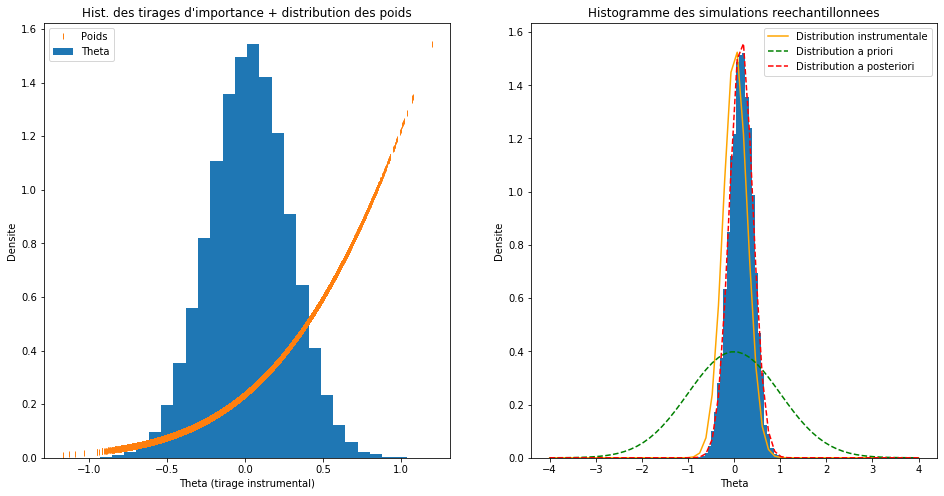

In [8]:
importance_sampling(data, option = 1)

array([ 0.25106596,  0.52291754,  0.3974675 , ...,  0.46961162,
       -0.10992507,  0.01404575])

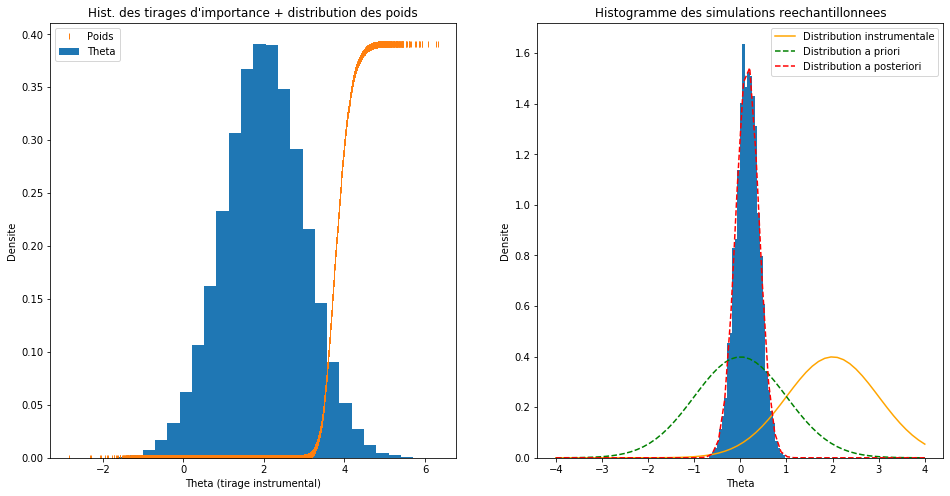

In [15]:
importance_sampling(data, option = 2)